### Reading, displaying and writing images

The *tifffile* package includes reading, writing of images. Images are read using the function **imread**, which takes as input a file name or an URL. To start off, let us load a sample image taken as example from CellProfiler website.     
Images can be saved to files using the **imsave** function.

In [1]:
import tifffile as tf

d0 = r'./ExampleHuman/images/AS_09125_050116030001_D03f00d0.tif'
nuc = tf.imread(d0)

stacks = r'./ExampleHuman/images/cells.tif'
cells = tf.imread(stacks)

#tf.imsave(nuc,'./ExampleHuman/images/AS_09125_050116030001_D03f00d0_copy.tif')

The image which we just loaded can be visualized by the **imshow** function with the pyplot module from *matplotlib* package.

In [2]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(2.5, 2.5))
plt.imshow(cells[0,:,:], cmap="gray")
plt.show()

<Figure size 250x250 with 1 Axes>

Sometimes it is helpful to compare different views of data side by side or just display image by row or column. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure.  **add.subplot()**, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the left to the right.

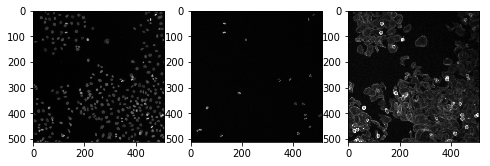

In [3]:
#plt.imshow(cells[2,:,:])
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 1
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cells[i-1,:,:],cmap="gray")
plt.show()

### Image data representation

To get the type of an object or variable we can use the built-in **type** function.  
Dimensions of the image can be accessed using the **shape** function from *numpy* package.  
We can manipulate image like you manipulate array in python because **images are arrays**.  
The distribution of pixel intensities can be plotted in a histogram with **hist** function and their range inspected using the **min** and **max** function. To compare image between them we can use **interp** function from *numpy* to normalize images.

<type 'numpy.ndarray'>
(512, 512)
(3, 512, 512)
[[8 8 8 8 8 8]
 [8 8 7 8 8 7]
 [9 8 8 8 8 8]]


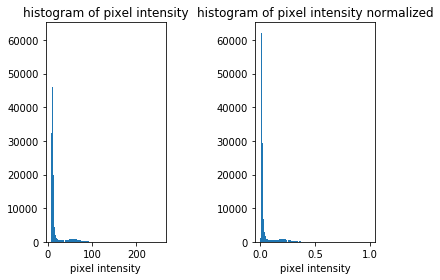

(7, 255)
(0.0, 1.0)


In [4]:
import numpy as np

print(type(nuc))
print(nuc.shape)
print(cells.shape)
print(nuc[0:3,0:6])

nuc_norm = np.interp(nuc, (nuc.min(), nuc.max()), (0,1))

fig, axes = plt.subplots(ncols=2)
ax0, ax1 = axes.flatten()
ax0.hist(nuc.ravel(), bins=256)
ax0.set_title("histogram of pixel intensity")
ax0.set_xlabel("pixel intensity")
ax1.hist(nuc_norm.ravel(), bins=256)
ax1.set_title("histogram of pixel intensity normalized")
ax1.set_xlabel("pixel intensity")
fig.tight_layout(w_pad=4)
plt.show()

print(nuc.min(), nuc.max())
print(nuc_norm.min(), nuc_norm.max())

### Color management

In 2D, color images are often represented in **RGB—3 layers of 2D arrays**, where the 3 layers represent (R)ed, (G)reen and (B)lue channels of the image. The simplest way of getting a colored image is to set each RGB channel to the grayscale image scaled by a different multiplier for each channel. For example, multiplying the green and blue channels by 0 leaves only the red channel and produces a bright red image. Similarly, multiplying the blue channel by 0 leaves only the red and green channels, which combine to form yellow.

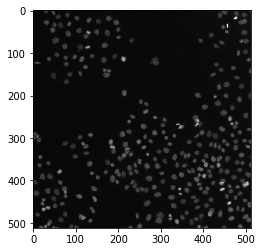

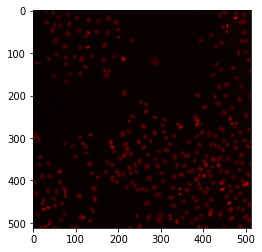

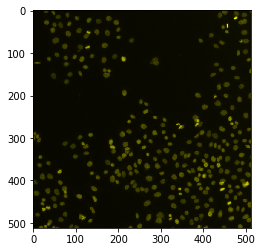

In [5]:
from skimage.color import gray2rgb

rgb_nuc = gray2rgb(nuc)
plt.imshow(rgb_nuc)
plt.show()

# red channel
red = [1,0,0]
r_nuc = rgb_nuc * red
plt.imshow(r_nuc)
plt.show()

# yellow channel
yellow = [1,1,0]
rg_nuc = rgb_nuc * yellow
plt.imshow(rg_nuc)
plt.show()

### Manipulating images

Being numeric arrays, images can be manipulated by any of python's arithmetic operators. For example, we can produce a **negative image** by simply subtracting the image from its maximum value.

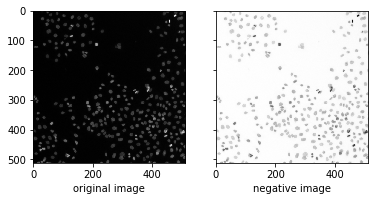

In [6]:
nuc_neg = nuc.max() - nuc
fig, axes = plt.subplots(ncols=2)
ax0, ax1 = axes.flatten()
ax0.imshow(nuc, cmap='gray')
ax0.set_xlabel("original image")
ax1.imshow(nuc_neg, cmap='gray')
ax1.set_xlabel("negative image")
plt.setp(ax1.get_yticklabels(), visible=False)
plt.show()

We can also increase **the brightness of an image** through addition, adjust **the contrast** through multiplication, and apply **gamma correction** through exponentiation.

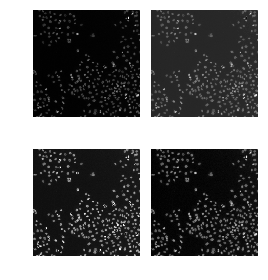

In [7]:
bright_nuc = nuc + 30
contrast_nuc = nuc * 2
gamma_nuc = nuc ** 0.5

fig, axes = plt.subplots(ncols=2, nrows=2)
ax0, ax1, ax2, ax3 = axes.flatten()
ax0.imshow(nuc, cmap='gray')
ax1.imshow(bright_nuc, cmap='gray')
ax2.imshow(contrast_nuc, cmap='gray')
ax3.imshow(gamma_nuc, cmap='gray')
ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
fig.tight_layout(w_pad=-15)
plt.show()

We can **crop and threshold images** with standard matrix operations.

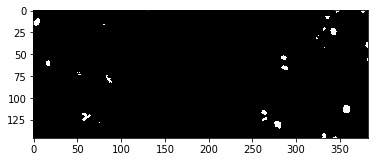

[[False False False ...  True  True False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [8]:
img_crop = nuc[366:512,58:441]
img_thresh = img_crop > 100
plt.imshow(img_thresh, cmap='gray')
plt.show()
print(img_thresh)

### spatial transformation

Spatial transformation can be done by **transform** module from *skimage* package. The **SimilarityTransform** function moves the image plane by the specified two-dimensional vector in such a way that pixels that end up outside the image region are cropped, and pixels that enter into the image region are set to background. The **rotate** function rotates the image clockwise by the given angle. The **resize** function scale an image with the desired dimensions.

/home/cedric/anaconda3/envs/py27/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


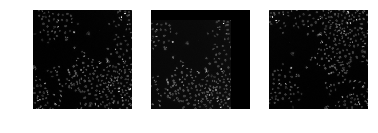

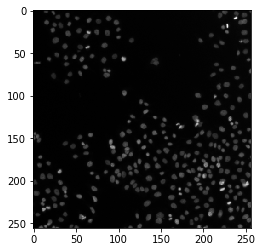

In [9]:
from skimage import transform as trf

translate = trf.SimilarityTransform(translation=(100,-50))

translated = trf.warp(nuc, translate)
rotated = trf.rotate(nuc, angle=90)
resized = trf.resize(nuc, (256,256))

fig, ax = plt.subplots(ncols=3)

ax[0].imshow(nuc, cmap=plt.cm.gray)
ax[1].imshow(translated, cmap=plt.cm.gray)
ax[2].imshow(rotated, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')
plt.show()

plt.imshow(resized, cmap=plt.cm.gray)
plt.show()

### Cell segmentation

We conclude my demonstration by applying various functions to the task of segmenting cells. Our goal is to computationally identify and qualitatively characterize the cells in the sample fluorescent microscopy images.  
For this we are going tu use the *skimage* package which offers several functions to reach our goal. Our example is taken from **Broad Bioimage Benchmark Collection**: These images are of human HT29 colon cancer cells, a cell line that has been widely used for the study of many normal and neoplastic processes. The samples were stained with Hoechst 33342, pH3, and phalloidin. **Hoechst 33342** is a DNA stain that labels the nucleus. **Phospho-histone H3** indicates mitosis. **Phalloidin** labels actin, which is present in the cytoplasm.  
We start by loading the images of mitosis and cell bodies since nuclei are loaded previously. To visualize the cells we create a composite of these images with the green and the blue channel (yellow) for the nuclei; with the red and blue channel (purple) for cell body and the blue channel for the mitosis.

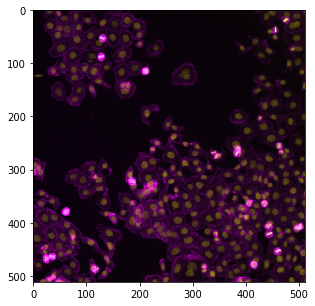

In [10]:
from skimage.color import gray2rgb, label2rgb
from skimage import restoration
from skimage.filters import threshold_otsu, sobel
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.morphology import dilation, disk
from skimage.segmentation import watershed, mark_boundaries
from skimage.measure import label, regionprops
from centrosome.propagate import propagate

np.set_printoptions(threshold='nan')

d1 = r'./ExampleHuman/images/AS_09125_050116030001_D03f00d1.tif'
mitosis = tf.imread(d1)

d2 = r'./ExampleHuman/images/AS_09125_050116030001_D03f00d2.tif'
cell = tf.imread(d2)

cell_norm = np.interp(cell, (cell.min(), cell.max()), (0,1))
mitosis_norm = np.interp(mitosis, (mitosis.min(), mitosis.max()), (0,1))

nuc_rgb = gray2rgb(nuc_norm)
nuc_rgb = nuc_rgb * [1,1,0]
cell_rgb = gray2rgb(cell_norm)
cell_rgb = cell_rgb * [1,0,1]
mitosis_rgb = gray2rgb(mitosis_norm)
mitosis_rgb = mitosis_rgb * [0,0,1]

composite = nuc_rgb + cell_rgb + mitosis_rgb
plt.figure(figsize=(5,5))
plt.imshow(composite)
plt.show()

First we segment nuclei and mitosis cells using **global thresholding**. **Otsu's** method is used to perform clustering based image thresholding. Assuming a bi-modal intensity distribution, pixels are separate into foreground and backround. The optimal threshold value to separate the two classes is determined by minimizing the combined intra-class variance or by maximizing the combined inter-class variance. *Skimage* contains a filters module  with a **threshold_otsu** function to do this.   
We can show the result by displaying the raw images, the segmented images and images overlay. Overlay can be done by the **contour** function from matplotlib.pyplot module.

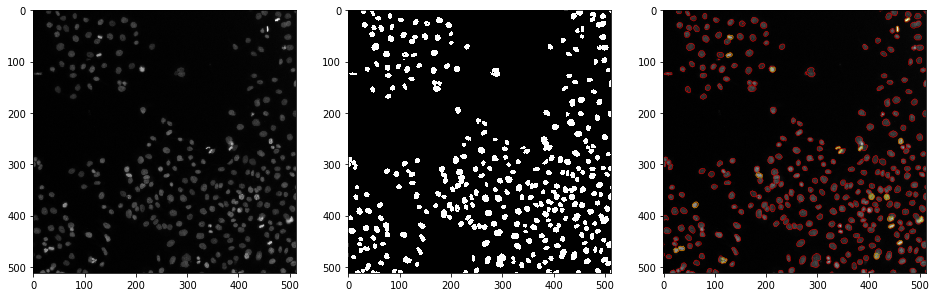

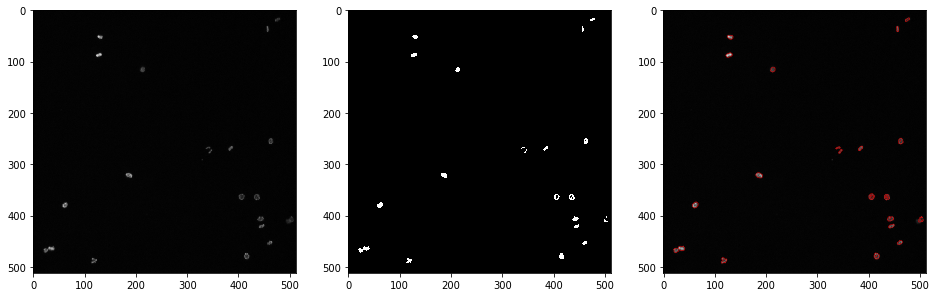

In [11]:
mask_nuc = np.zeros(nuc_norm.shape, dtype = bool)
mask_nuc[nuc_norm > threshold_otsu(nuc_norm)] = 1

mask_mitosis = np.zeros(mitosis_norm.shape, dtype = bool)
mask_mitosis[mitosis_norm > threshold_otsu(mitosis_norm)] = 1

fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(nuc_norm, cmap = 'gray')
ax[1].imshow(mask_nuc, cmap = 'gray')
ax[2].imshow(nuc_norm, cmap = 'gray') 
ax[2].contour(mask_nuc, colors = 'r', linewidths = 0.1)
ax[2].contour(mask_mitosis, colors = 'y', linewidths = 0.1)
plt.show()

fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(mitosis_norm, cmap = 'gray')
ax[1].imshow(mask_mitosis, cmap = 'gray')
ax[2].imshow(mitosis_norm, cmap = 'gray') 
ax[2].contour(mask_mitosis, colors = 'r', linewidths = 0.1)
plt.show()

The **label** function from skimage.measure module finds every connected set of pixels other than the background, and relabels these sets with a unique increasing integer. The zero corresponding to background. So we mark the nuclei and mitosis cells. 

293
22


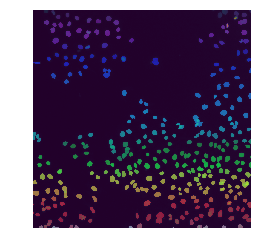

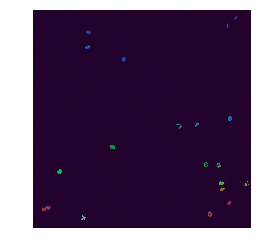

In [12]:
markers_nuc = label(mask_nuc, connectivity=2, return_num=True)
markers_mitosis = label(mask_mitosis, connectivity=2, return_num=True)

print markers_nuc[1]
print markers_mitosis[1]

plt.imshow(nuc_norm)
plt.imshow(markers_nuc[0], cmap = "nipy_spectral", alpha = 0.5)
plt.axis('off')
plt.show()

plt.imshow(mitosis_norm)
plt.imshow(markers_mitosis[0], cmap = "nipy_spectral", alpha = 0.5)
plt.axis('off')
plt.show()

Next, we use the segmented nuclei as seeds in the **Voronoi segmentation** of the cytoplasm. The space is partitioned thanks to the presence of seeds in such a way that each point in the space is assigned to its closest seed. This function is implemented in *centrosome* package, an open source image processing library. To avoid partitioning the entire image, we use a subspace. **Propagate** allows for this generalization through its mask argument. We apply a sobel filter to detect edges from cell body and serve as input for the propagate function.

293


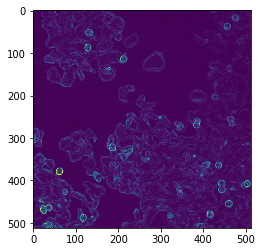

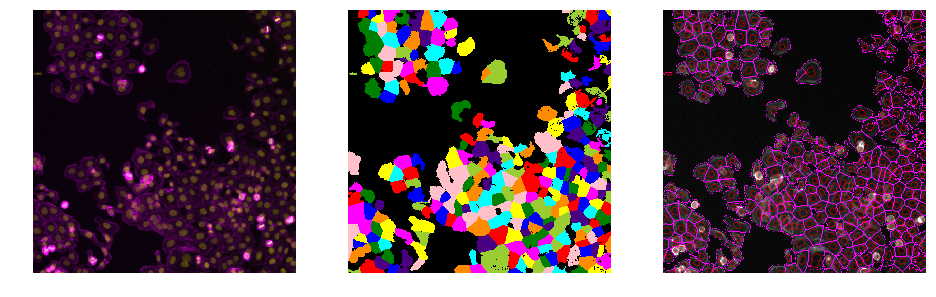

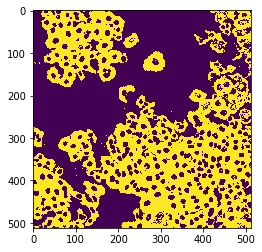

In [13]:
fsobel = np.empty_like(cell_norm)
fsobel = sobel(cell_norm)

plt.imshow(fsobel)

mask_cell = np.zeros(cell_norm.shape, dtype = bool)
mask_cell[cell_norm > threshold_otsu(cell_norm * 0.3)] = True

#cyto_seg = watershed(image=fsobel, markers=markers, compactness = 0.00001)
cell_seg,_ = propagate(image=fsobel, labels=markers_nuc[0], mask=mask_cell, weight=1)

labeled = label(cell_seg, connectivity=2, return_num=True)

print(labeled[1])

fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(composite)
ax[1].imshow(label2rgb(labeled[0], bg_label=0))
ax[2].imshow(mark_boundaries(cell_norm, cell_seg, color=(1,0,1)))
ax[2].contour(mask_nuc, colors = 'r', linewidths = 0.1)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

cyto = np.logical_xor(mask_cell, mask_nuc)
plt.imshow(cyto)


### Extracting Quantitative Measurements

Image analysis makes it possible to obtain **quantitative information** on the cells. We can, after segmentation, extract various cell features including area, shape, intensity, and texture. As example, we are going to extract measurements: the id of cells and the id of nuclei, then we can get the mean intensity of the cells and the number of mitosis cells for each nucleus.

In [14]:
results = {"cell_id":[],
           "cell_mean":[],
           "nuc_id":[],
           "mitosis_count":[]}


#unique id and mean intensity values for cell
for cell_id in np.unique(cell_seg)[1:,]:
    cell_mask = cell_seg==cell_id
    results["cell_id"].append(cell_id.item())
    results["cell_mean"].append(np.mean(cell_norm[cell_mask]).item())


#for each nucleus get number of ph3
parent = markers_nuc[0]
child = markers_mitosis[0]

for nuc_id in np.unique(parent)[1:,]:
    nuc_mask = parent == nuc_id
    results["nuc_id"].append(nuc_id.item())
    results["mitosis_count"].append(np.count_nonzero(np.unique(child[nuc_mask])))
    
for key in results.keys(): print key, '\n', results[key], '\n'

nuc_id 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,

Next, we are going to interest to the mitotic index, MI. We calculated the fraction of cells in mitosis by dividing the number of pH3-positive cells by total cell number. The goal is to find mitotic regulator.  
Before calulate MI, we should have the number of Ph3-positive cells and the total cell number thanks the label method from skimage view previously.  
To do statiscal analysis, I retrieve more data from Broad Bioimage Benchmark Collection.  The files are in DIB format, as produced by the Cellomics ArrayScan instrument at the Whitehead–MIT Bioimaging Center. Used Bio-Formats to read the DIB files. Each image is 512 x 512 pixels.

In [15]:
import javabridge as jv
import bioformats as bf
import os
import re

#When starting the Java virtual machine with python-javabridge’s javabridge.start_vm(), 
#you must add the contents of bioformats.JARS to the class path.
jv.start_vm(class_path=bf.JARS)

def get_filenames(path):
    filenames = list()
    rx = re.compile('(d0)')
    filenames.append(filter(rx.search, os.listdir(path)))
    rx = re.compile('(d1)')
    filenames.append(filter(rx.search, os.listdir(path)))
    filenames[0] = sorted(filenames[0])
    filenames[1] = sorted(filenames[1])
    return filenames

def display_images(images, path):
    incr = 1
    fig=plt.figure(figsize=(20, 20))
    for x in images:
        fig.add_subplot(1,6,incr)
        incr = incr + 1
        rdr = bf.ImageReader(path+x)
        image2d = rdr.read(z=0, t=0, series=0, rescale=False)
        image2d_norm = np.interp(image2d, (image2d.min(), image2d.max()), (0,1))
        mask_image2d = np.zeros(image2d_norm.shape, dtype = bool)
        mask_image2d[image2d_norm > threshold_otsu(image2d_norm)] = 1
        markers_image2d = label(mask_image2d, connectivity=2, return_num=True)
        plt.imshow(markers_image2d[0], cmap = 'nipy_spectral')

def get_labels(images, path):
    markers = []
    for x in images:
        rdr = bf.ImageReader(path+x)
        image2d = rdr.read(z=0, t=0, series=0, rescale=False)
        image2d_norm = np.interp(image2d, (image2d.min(), image2d.max()), (0,1))
        mask_image2d = np.zeros(image2d_norm.shape, dtype = bool)
        mask_image2d[image2d_norm > threshold_otsu(image2d_norm)] = 1
        markers_image2d = label(mask_image2d, connectivity=2, return_num=True)
        markers.append(markers_image2d[1])
    return(markers)

def remove_noise(label_d0, label_d1):
    for i in range(len(label_d0)):
        if label_d0[i] < label_d1[i]:
            label_d1[i] = 0
    return(label_d1)

p5A12_filenames = get_filenames('./ExampleHuman/images/p5A12/')
p5A14_filenames = get_filenames('./ExampleHuman/images/p5A14/')
p5A16_filenames = get_filenames('./ExampleHuman/images/p5A16/')
p5A18_filenames = get_filenames('./ExampleHuman/images/p5A18/')
p5A20_filenames = get_filenames('./ExampleHuman/images/p5A20/')
p8E24_filenames = get_filenames('./ExampleHuman/images/p8E24/')
p8G2_filenames = get_filenames('./ExampleHuman/images/p8G2/')
p8G4_filenames = get_filenames('./ExampleHuman/images/p8G4/')
p8G6_filenames = get_filenames('./ExampleHuman/images/p8G6/')
p8G8_filenames = get_filenames('./ExampleHuman/images/p8G8/')
p13K11_filenames = get_filenames('./ExampleHuman/images/p13K11/')
p13K13_filenames = get_filenames('./ExampleHuman/images/p13K13/')
p13K15_filenames = get_filenames('./ExampleHuman/images/p13K15/')
p13K17_filenames = get_filenames('./ExampleHuman/images/p13K17/')
p13K19_filenames = get_filenames('./ExampleHuman/images/p13K19/')
p5O4_filenames = get_filenames('./ExampleHuman/images/p5O4/')
p5O6_filenames = get_filenames('./ExampleHuman/images/p5O6/')
p5O8_filenames = get_filenames('./ExampleHuman/images/p5O8/')
p5O10_filenames = get_filenames('./ExampleHuman/images/p5O10/')
p5O12_filenames = get_filenames('./ExampleHuman/images/p5O12/')

p5A12_d1 = remove_noise(get_labels(p5A12_filenames[0], './ExampleHuman/images/p5A12/'), 
                        get_labels(p5A12_filenames[1], './ExampleHuman/images//p5A12/'))
p5A14_d1 = remove_noise(get_labels(p5A14_filenames[0], './ExampleHuman/images/p5A14/'), 
                        get_labels(p5A14_filenames[1], './ExampleHuman/images/p5A14/'))
p5A16_d1 = remove_noise(get_labels(p5A16_filenames[0], './ExampleHuman/images/p5A16/'), 
                        get_labels(p5A16_filenames[1], './ExampleHuman/images/p5A16/'))
p5A18_d1 = remove_noise(get_labels(p5A18_filenames[0], './ExampleHuman/images/p5A18/'), 
                        get_labels(p5A18_filenames[1], './ExampleHuman/images/p5A18/'))
p5A20_d1 = remove_noise(get_labels(p5A20_filenames[0], './ExampleHuman/images/p5A20/'), 
                        get_labels(p5A20_filenames[1], './ExampleHuman/images/p5A20/'))
p8E24_d1 = remove_noise(get_labels(p8E24_filenames[0], './ExampleHuman/images/p8E24/'), 
                        get_labels(p8E24_filenames[1], './ExampleHuman/images/p8E24/'))
p8G2_d1 = remove_noise(get_labels(p8G2_filenames[0], './ExampleHuman/images/p8G2/'), 
                       get_labels(p8G2_filenames[1], './ExampleHuman/images/p8G2/'))
p8G4_d1 = remove_noise(get_labels(p8G4_filenames[0], './ExampleHuman/images/p8G4/'), 
                       get_labels(p8G4_filenames[1], './ExampleHuman/images/p8G4/'))
p8G6_d1 = remove_noise(get_labels(p8G6_filenames[0], './ExampleHuman/images/p8G6/'), 
                       get_labels(p8G6_filenames[1], './ExampleHuman/images/p8G6/'))
p8G8_d1 = remove_noise(get_labels(p8G8_filenames[0], './ExampleHuman/images/p8G8/'), 
                       get_labels(p8G8_filenames[1], './ExampleHuman/images/p8G8/'))
p13K11_d1 = remove_noise(get_labels(p13K11_filenames[0], './ExampleHuman/images/p13K11/'), 
                         get_labels(p13K11_filenames[1], './ExampleHuman/images/p13K11/'))
p13K13_d1 = remove_noise(get_labels(p13K13_filenames[0], './ExampleHuman/images/p13K13/'), 
                         get_labels(p13K13_filenames[1], './ExampleHuman/images/p13K13/'))
p13K15_d1 = remove_noise(get_labels(p13K15_filenames[0], './ExampleHuman/images/p13K15/'), 
                         get_labels(p13K15_filenames[1], './ExampleHuman/images/p13K15/'))
p13K17_d1 = remove_noise(get_labels(p13K17_filenames[0], './ExampleHuman/images/p13K17/'), 
                         get_labels(p13K17_filenames[1], './ExampleHuman/images/p13K17/'))
p13K19_d1 = remove_noise(get_labels(p13K19_filenames[0], './ExampleHuman/images/p13K19/'), 
                         get_labels(p13K19_filenames[1], './ExampleHuman/images/p13K19/'))
p5O4_d1 = remove_noise(get_labels(p5O4_filenames[0], './ExampleHuman/images/p5O4/'), 
                       get_labels(p5O4_filenames[1], './ExampleHuman/images/p5O4/'))
p5O6_d1 = remove_noise(get_labels(p5O6_filenames[0], './ExampleHuman/images/p5O6/'), 
                       get_labels(p5O6_filenames[1], './ExampleHuman/images/p5O6/'))
p5O8_d1 = remove_noise(get_labels(p5O8_filenames[0], './ExampleHuman/images/p5O8/'), 
                       get_labels(p5O8_filenames[1], './ExampleHuman/images/p5O8/'))
p5O10_d1 = remove_noise(get_labels(p5O10_filenames[0], './ExampleHuman/images/p5O10/'), 
                        get_labels(p5O10_filenames[1], './ExampleHuman/images/p5O10/'))
p5O12_d1 = remove_noise(get_labels(p5O12_filenames[0], './ExampleHuman/images/p5O12/'), 
                        get_labels(p5O12_filenames[1], './ExampleHuman/images/p5O12/'))

count = {'p5A12_nuc':get_labels(p5A12_filenames[0], './ExampleHuman/images/p5A12/'),'p5A12_ph3':p5A12_d1,
        'p5A14_nuc':get_labels(p5A14_filenames[0], './ExampleHuman/images/p5A14/'),'p5A14_ph3':p5A14_d1,
        'p5A16_nuc':get_labels(p5A16_filenames[0], './ExampleHuman/images/p5A16/'),'p5A16_ph3':p5A16_d1,
        'p5A18_nuc':get_labels(p5A18_filenames[0], './ExampleHuman/images/p5A18/'),'p5A18_ph3':p5A18_d1,
        'p5A20_nuc':get_labels(p5A20_filenames[0], './ExampleHuman/images/p5A20/'),'p5A20_ph3':p5A20_d1,
        'p8E24_nuc':get_labels(p8E24_filenames[0], './ExampleHuman/images/p8E24/'),'p8E24_ph3':p8E24_d1,
        'p8G2_nuc':get_labels(p8G2_filenames[0], './ExampleHuman/images/p8G2/'),'p8G2_ph3':p8G2_d1,
        'p8G4_nuc':get_labels(p8G4_filenames[0], './ExampleHuman/images/p8G4/'),'p8G4_ph3':p8G4_d1,
        'p8G6_nuc':get_labels(p8G6_filenames[0], './ExampleHuman/images/p8G6/'),'p8G6_ph3':p8G6_d1,
        'p8G8_nuc':get_labels(p8G8_filenames[0], './ExampleHuman/images/p8G8/'),'p8G8_ph3':p8G8_d1,
        'p13K11_nuc':get_labels(p13K11_filenames[0], './ExampleHuman/images/p13K11/'),'p13K11_ph3':p13K11_d1,
        'p13K13_nuc':get_labels(p13K13_filenames[0], './ExampleHuman/images/p13K13/'),'p13K13_ph3':p13K13_d1,
        'p13K15_nuc':get_labels(p13K15_filenames[0], './ExampleHuman/images/p13K15/'),'p13K15_ph3':p13K15_d1,
        'p13K17_nuc':get_labels(p13K17_filenames[0], './ExampleHuman/images/p13K17/'),'p13K17_ph3':p13K17_d1,
        'p13K19_nuc':get_labels(p13K19_filenames[0], './ExampleHuman/images/p13K19/'),'p13K19_ph3':p13K19_d1,
        'p5O4_nuc':get_labels(p5O4_filenames[0], './ExampleHuman/images/p5O4/'),'p5O4_ph3':p5O4_d1,
        'p5O6_nuc':get_labels(p5O6_filenames[0], './ExampleHuman/images/p5O6/'),'p5O6_ph3':p5O6_d1,
        'p5O8_nuc':get_labels(p5O8_filenames[0], './ExampleHuman/images/p5O8/'),'p5O8_ph3':p5O8_d1,
        'p5O10_nuc':get_labels(p5O10_filenames[0], './ExampleHuman/images/p5O10/'),'p5O10_ph3':p5O10_d1,
        'p5O12_nuc':get_labels(p5O12_filenames[0], './ExampleHuman/images/p5O12/'),'p5O12_ph3':p5O12_d1}

Then we save the result in a file

In [16]:
with open('test.txt','w') as outfile:

    # Use the file_object.write(string) method to write strings to the file. First write the header of the
    # date (the result dict keys), separated by tabs ('\t'). It makes sense to first generate a complete
    # string with all the headers and then write this string to the file. Note that you will need to 
    # explicitly write 'newline' characters ('\n') at the end of the line to switch to the next line.
    sorted_keys = sorted(count.keys())
    header_string = '\t'.join(sorted_keys) + '\n'
    outfile.write(header_string)

    # After writing the headers, iterate over all the cells saved and write the data to the file by
    # creating strings similar to the header string.
    for index in range(len(count['p5A12_nuc'])):
        data_string = '\t'.join([str(count[key][index]) for key in sorted_keys]) + '\n'
        outfile.write(data_string)